In [1]:
#read csv
pewdata<-read.csv("/Users/mitalibhiwande/Desktop/Lab3/pewdataact4.csv")

In [3]:
names(pewdata)

[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

In [61]:
#select 5 columns considering only the data where an individual has mobile phone or doesn't have. 
#Other attributes included are the person's age,sex,his state and his marital status(as provided by him).
coldata<-pewdata[(pewdata$device1a==1|pewdata$device1a==2),c("age","sex", "state","device1a","marital")]

In [115]:
head(coldata)

age,sex,state,device1a,marital
47,2,51,1,1
63,2,24,1,1
86,2,39,1,5
40,2,37,1,1
65,2,21,2,9
69,2,20,1,1


In [116]:
#normalizing data
coldata<-na.omit(coldata)
nrow(coldata)

[1] 698

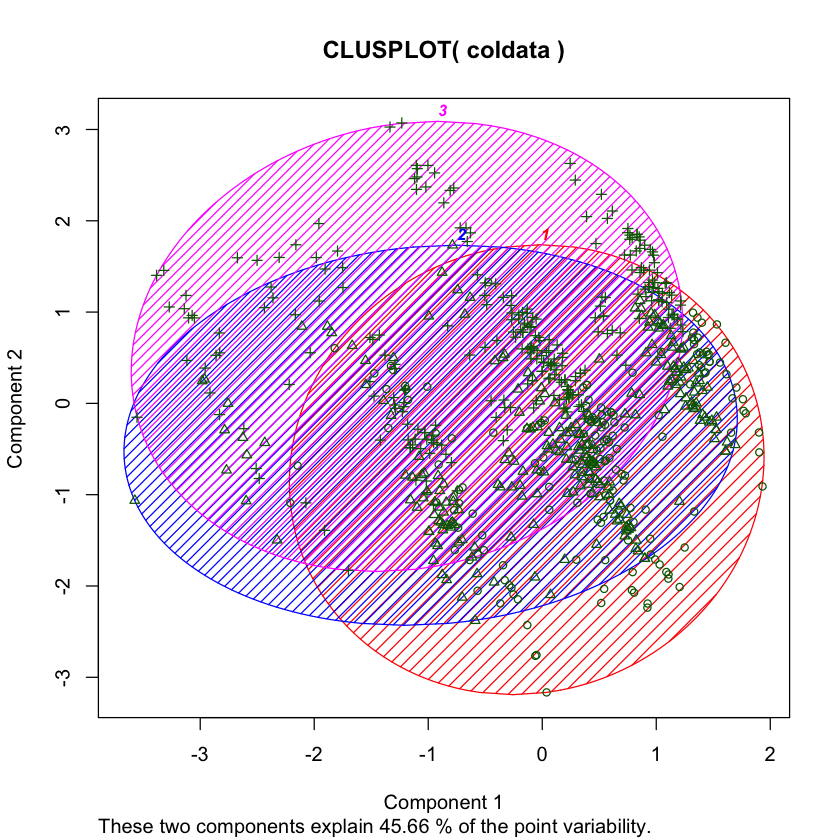

In [164]:
#perform kmeans using k=3 and plot the clusters using clusplot.
# plus-cluster3, triangle-cluster2, circle-cluster1
kmean3<-kmeans(coldata, 3, iter.max = 5, nstart = 1, trace=FALSE)
library(cluster)
clusplot(coldata, kmean3$cluster, color=TRUE, lines=1,shade=TRUE,
   labels=4, cex=0.8)

In [ ]:
#As we see, clusplot considers the two prime components of the data. 
#The above plot for k=3 gives a distribution of clusters as per their size and density.
#The plot explains 45.66% point variability considering just the 2 compoents as compared to the complete data.


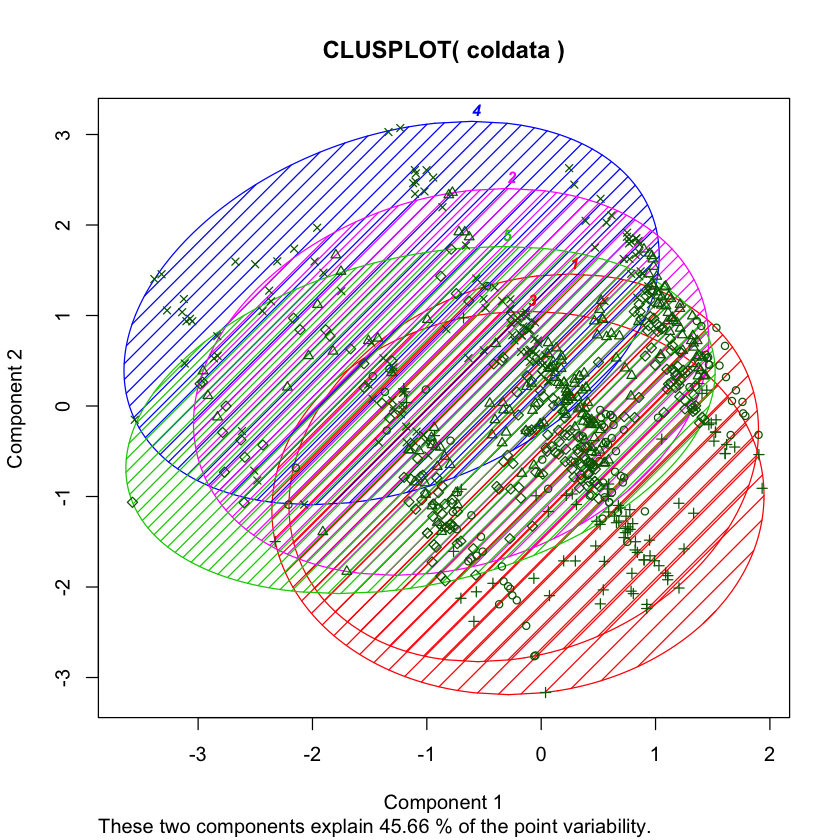

In [125]:
#perform kmeans using k=5 and plot the clusters using clusplot.
#square-cluster5, cross-cluster4, plus-cluster3, triangle-cluster2, circle-cluster1
kmean5<-kmeans(coldata, 5, iter.max = 5, nstart = 1, trace=FALSE)
library(cluster)
clusplot(coldata, kmean5$cluster, color=TRUE, lines=1,shade=TRUE,
   labels=4, cex=0.8)

In [ ]:
#As seen before, clusplot considers the two prime components of the data. 
#The above plot for k=5 gives a distribution of clusters as per their size and density.
#The plot explains 45.66% point variability considering just the 2 compoents as compared to the complete data.


# Interpreting the cluster characteristics

### 1. Cluster assignment

In [165]:
#Depending on the value of k, the users are assigned to different clusters where number of clusters(k) vary.
k<-as.data.frame(kmean3$cluster)
k$k5clusters<-kmean5$cluster
print(k)

    kmean3$cluster k5clusters
1                1          2
2                2          5
3                3          4
4                1          1
5                2          5
6                2          5
7                3          4
8                2          5
9                3          4
10               2          5
11               2          5
12               3          4
13               1          2
14               2          5
15               1          1
16               2          3
17               2          5
18               2          5
19               3          2
20               2          3
21               1          1
22               2          5
23               3          4
24               3          2
25               2          5
26               1          1
27               1          1
28               3          4
29               2          5
30               2          2
31               3          2
32               3          2
33        

### 2. Matrix of cluster centers for each attribute of data (k=3 and k=5)

In [147]:
head(kmean3$centers)
head(kmean5$centers)
#values of clusters for different values of k fro each attribute of data 

,age,sex,state,device1a,marital
1,38.48214,1.583333,31.83929,1.107143,2.809524
2,67.05200,1.608000,13.54000,1.104000,2.476000
3,70.65000,1.607143,41.89643,1.182143,2.507143


,age,sex,state,device1a,marital
1,32.82927,1.536585,37.853659,1.109756,3.329268
2,58.14362,1.574468,39.287234,1.095745,2.223404
3,44.54118,1.670588,9.858824,1.105882,2.258824
4,78.60811,1.635135,42.804054,1.236486,2.675676
5,71.62564,1.600000,14.369231,1.123077,2.635897


## 3. The total sum of squares (k=3 and k=5)

In [155]:
head(kmean3$totss)
head(kmean5$totss)

[1] 375798.9

[1] 375798.9

## 4. Vector of within-cluster sum of squares, one component per cluster. (k=3 and k=5) 

In [168]:
head(kmean3$withinss)
head(kmean5$withinss)
#Lower is better.  
#Seeing a high withinss would indicate either outliers are in your data or you need to create more clusters.
#here, k=5 has lower values of withinss.

[1] 49970.04 47640.26 50440.80

[1] 13778.37 19104.46 13270.54 19192.04 25762.08

## 5. Total within-cluster sum of squares, i.e. sum(withinss). (for k=3 and k=5)

In [170]:
head(kmean3$tot.withinss)
head(kmean5$tot.withinss)


[1] 148051.1

[1] 91107.49

## 6. The between-cluster sum of squares, i.e. totss-tot.withinss (for k=3 and k=5)

In [172]:
head(kmean3$betweenss)
head(kmean5$betweenss)
#Ideally you want cluster centers far apart from each other.
#here, for k=5, cluster centers are much far from each other.

[1] 227747.8

[1] 284691.4

## 7. The number of points in each cluster (for k=3 and k=5)

In [173]:
head(kmean3$size)
head(kmean5$size)
#data seems to be fairly distributed in k=5 

[1] 165 252 281

[1]  82 188  85 148 195

## 8. Plot of "Value of K" v/s "Average Total Within Sum of Squares"

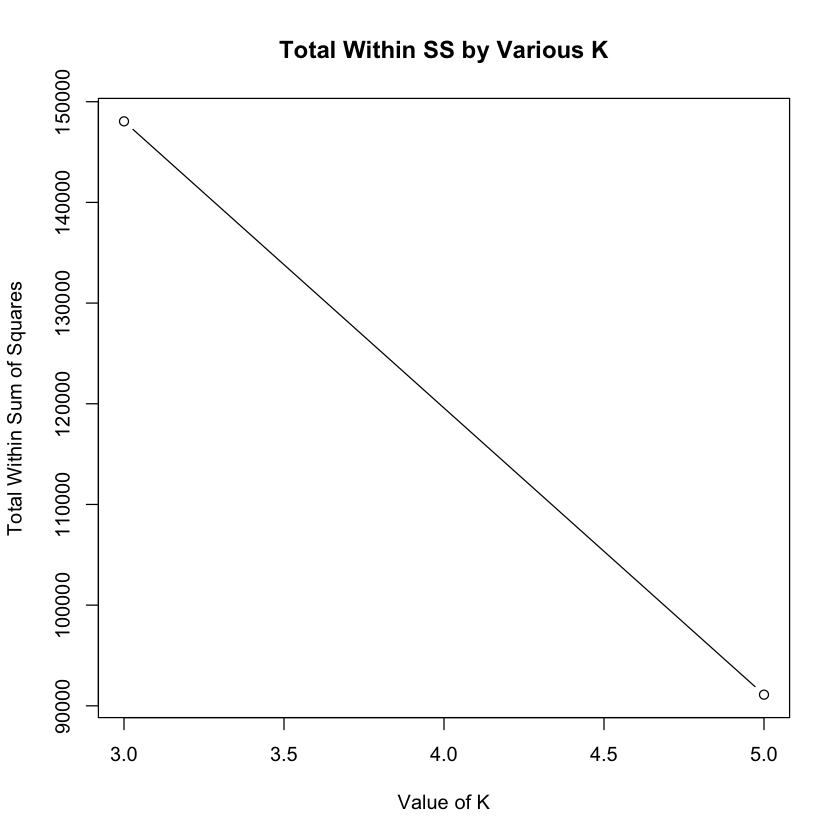

In [178]:
plot(x=c(3,5),y=c(kmean3$tot.withinss,kmean5$tot.withinss),type="b", main="Total Within SS by Various K",
 ylab="Total Within Sum of Squares",
 xlab="Value of K")

In [ ]:
# As seen from the above plots, 
#ideal value of k between k=3 and k=5 would be k=5 as around k=5 we observe the loss of dramatic gains(lower value)

# References:
#### http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/
#### http://www.statmethods.net/advstats/cluster.html